In [1]:
#importing necessary libraries
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
#reading the dataset file using pandas
df=pd.read_csv('Rating_Reviews.csv') 
#Checking the dataset
df  

,Unnamed: 0,Product_Review,Ratings
0,0,I own a beyerdynamic headphone & If you have a...,5.0
1,1,Well one says we should Compare apple to apple...,5.0
2,2,For the price excellent headphones. Great soun...,5.0
3,3,I don't understand what was all the hype assoc...,2.0
4,4,I have thoroughly used for 1 week So I will sa...,4.0
...,...,...,...
37995,37995,"Recently I ordered it, while recording video f...",1.0
37996,37996,Very good display and in hand feel is great. G...,5.0
37997,37997,Best mid range 5G smartphone by OPPO.Pros :1. ...,5.0
37998,37998,My usecase - I replaced by secondary phone Red...,5.0


In this dataset total we have 38000 rows and 3 columns

We can see that Unnamed:0 is just the index number we dont use that column it is not any impact for building the model.lets drop that column


In [3]:
#droping the column 
df.drop('Unnamed: 0',axis=1,inplace=True)

In [4]:
#read top 5 records from a dataset using .head method
df.head()

,Product_Review,Ratings
0,I own a beyerdynamic headphone & If you have a...,5.0
1,Well one says we should Compare apple to apple...,5.0
2,For the price excellent headphones. Great soun...,5.0
3,I don't understand what was all the hype assoc...,2.0
4,I have thoroughly used for 1 week So I will sa...,4.0


In [6]:
#Checking the dimensions of the dataset
df.shape

(38000, 2)

In [5]:
#checking information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38000 entries, 0 to 37999
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Product_Review  37280 non-null  object 
 1   Ratings         38000 non-null  float64
dtypes: float64(1), object(1)
memory usage: 593.9+ KB


In information we observed many things like shape of the dataset 38000 columns and 2 columns,data types of a columns product review is onject type and ratings are float type and there are some null values present in product review column we need to fill null values.

## Data pre-processing

In [9]:
#checking for null values 
df.isnull().sum()

Product_Review    720
Ratings             0
dtype: int64

we have total 720 null values present in a product review column so we need to do fill that null values

In [10]:
#We can handle missing data by filling them with 'No Review' using fillna()
df['Product_Review'].fillna('No review',inplace=True)

In [11]:
#Checking after filling null values
df.isnull().sum()  

Product_Review    0
Ratings           0
dtype: int64

now happy to see this there are no null values in a dataset 

<AxesSubplot:>

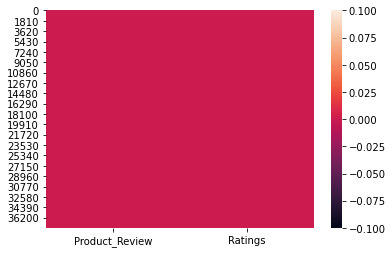

In [12]:
#Visualizing missing values if any through heatmap 
sns.heatmap(df.isnull())

In [14]:
print('Rating counts','\n',df.Ratings.value_counts())

Rating counts 
 5.0    13562
1.0    13304
4.0     5773
3.0     3513
2.0     1848
Name: Ratings, dtype: int64


## Data Visualization

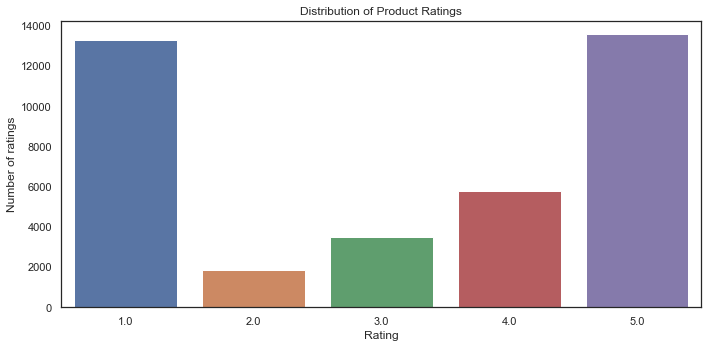

In [18]:
#let’s visualize the count of Ratings variable using Seaborn
sns.set_theme(style = 'white')
plt.figure(figsize = (10,5))
ax = sns.countplot(x = df['Ratings'])
ax.set(title="Distribution of Product Ratings", xlabel="Rating", ylabel="Number of ratings")
plt.tight_layout()

Observations- 1&5 star has been given the maximum ratings by the users and minimum is 2,3&4  stars

## NLP for Sentiment analysis

In [30]:
#Importing required libraries
import re 
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
from nltk.stem import SnowballStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [20]:
def clean_text(df, df_column_name):
    
    #Converting all messages to lowercase
    df[df_column_name] = df[df_column_name].str.lower()

    #Replace email addresses with 'email'
    df[df_column_name] = df[df_column_name].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$','emailaddress')

    #Replace URLs with 'webaddress'
    df[df_column_name] = df[df_column_name].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$','webaddress')

    #Replace money symbols with 'dollars' (£ can by typed with ALT key + 156)
    df[df_column_name] = df[df_column_name].str.replace(r'£|\$', 'dollars')
      
    #Replace 10 digit phone numbers (formats include paranthesis, spaces, no spaces, dashes) with 'phonenumber'
    df[df_column_name] = df[df_column_name].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$','phonenumber')

    #Replace numbers with 'numbr'
    df[df_column_name] = df[df_column_name].str.replace(r'\d+(\.\d+)?', 'numbr')

    #Remove punctuation
    df[df_column_name] = df[df_column_name].str.replace(r'[^\w\d\s]', ' ')

    #Replace whitespace between terms with a single space
    df[df_column_name] = df[df_column_name].str.replace(r'\s+', ' ')

    #Remove leading and trailing whitespace
    df[df_column_name] = df[df_column_name].str.replace(r'^\s+|\s+?$', '')
    
    #Remove stopwords
    stop_words = set(stopwords.words('english') + ['u', 'ü', 'â', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure'])
    df[df_column_name] = df[df_column_name].apply(lambda x: ' '.join(term for term in x.split() if term not in stop_words))

In [21]:
#Calling the class
clean_text(df, 'Product_Review')
df['Product_Review']

0        beyerdynamic headphone idea premium headphones...
1        well one says compare apple apple went ahead c...
2        price excellent headphones great soundstage ma...
3        understand hype associated headphones found av...
4        thoroughly used numbr week say pros cons headp...
                               ...                        
37995    recently ordered recording video front camera ...
37996    good display hand feel great good camera works...
37997    best mid range numbrg smartphone oppo pros num...
37998    usecase replaced secondary phone redmi note nu...
37999    writing open review phone using approximately ...
Name: Product_Review, Length: 38000, dtype: object

In [22]:
#Tokenizing the data using RegexpTokenizer
from nltk.tokenize import RegexpTokenizer
tokenizer=RegexpTokenizer(r'\w+')
df['Product_Review'] = df['Product_Review'].apply(lambda x: tokenizer.tokenize(x.lower()))
df.head()

,Product_Review,Ratings
0,"[beyerdynamic, headphone, idea, premium, headp...",5.0
1,"[well, one, says, compare, apple, apple, went,...",5.0
2,"[price, excellent, headphones, great, soundsta...",5.0
3,"[understand, hype, associated, headphones, fou...",2.0
4,"[thoroughly, used, numbr, week, say, pros, con...",4.0


In [23]:
# Lemmatizing and then Stemming with Snowball to get root words and further reducing characters
stemmer = SnowballStemmer("english")
import gensim
def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text,pos='v'))

#Tokenize and Lemmatize
def preprocess(text):
    result=[]
    for token in text:
        if len(token)>=3:
            result.append(lemmatize_stemming(token))
            
    return result

In [24]:
#Processing review with above Function
processed_review = []

for doc in df.Product_Review:
    processed_review.append(preprocess(doc))
    
print(len(processed_review))
processed_review[:3]

38000


[['beyerdynam',
  'headphon',
  'idea',
  'premium',
  'headphon',
  'must',
  'say',
  'get',
  'better',
  'price',
  'point',
  'better',
  'bass',
  'compar',
  'mention',
  'headphon',
  'diot',
  'judg',
  'bass',
  'listen',
  'youtub',
  'headphon',
  'pretti',
  'light',
  'decent',
  'batteri',
  'backup',
  'better',
  'connect',
  'bet',
  'regret',
  'buy',
  'music',
  'lover',
  'musician',
  'know',
  'exact',
  'headphon',
  'rare',
  'rat',
  'someth',
  'buy',
  'headphon',
  'forc',
  'share',
  'experi',
  'need',
  'much',
  'money',
  'experi',
  'richer',
  'premium',
  'feel'],
 ['well',
  'one',
  'say',
  'compar',
  'appl',
  'appl',
  'go',
  'ahead',
  'compar',
  'monster',
  'audio',
  'technica',
  'numbrx',
  'surpris',
  'par',
  'numbrx',
  'term',
  'base',
  'crisp',
  'sound',
  'sound',
  'smooth',
  'give',
  'pleasur',
  'ear',
  'posit',
  'neget',
  'big',
  'ear',
  'use',
  'continu',
  'without',
  'hurt',
  'ear',
  'batteri',
  'say',
  

In [25]:
df['clean_review']=processed_review  #Assigning this to the dataframe
df.head()

,Product_Review,Ratings,clean_review
0,"[beyerdynamic, headphone, idea, premium, headp...",5.0,"[beyerdynam, headphon, idea, premium, headphon..."
1,"[well, one, says, compare, apple, apple, went,...",5.0,"[well, one, say, compar, appl, appl, go, ahead..."
2,"[price, excellent, headphones, great, soundsta...",5.0,"[price, excel, headphon, great, soundstag, may..."
3,"[understand, hype, associated, headphones, fou...",2.0,"[understand, hype, associ, headphon, find, ave..."
4,"[thoroughly, used, numbr, week, say, pros, con...",4.0,"[thorough, use, numbr, week, say, pros, con, h..."


In [26]:
df['Product_Review'] = df['clean_review'].apply(lambda x:' '.join(y for y in x))
df.head()

,Product_Review,Ratings,clean_review
0,beyerdynam headphon idea premium headphon must...,5.0,"[beyerdynam, headphon, idea, premium, headphon..."
1,well one say compar appl appl go ahead compar ...,5.0,"[well, one, say, compar, appl, appl, go, ahead..."
2,price excel headphon great soundstag may bassi...,5.0,"[price, excel, headphon, great, soundstag, may..."
3,understand hype associ headphon find averag go...,2.0,"[understand, hype, associ, headphon, find, ave..."
4,thorough use numbr week say pros con headphon ...,4.0,"[thorough, use, numbr, week, say, pros, con, h..."


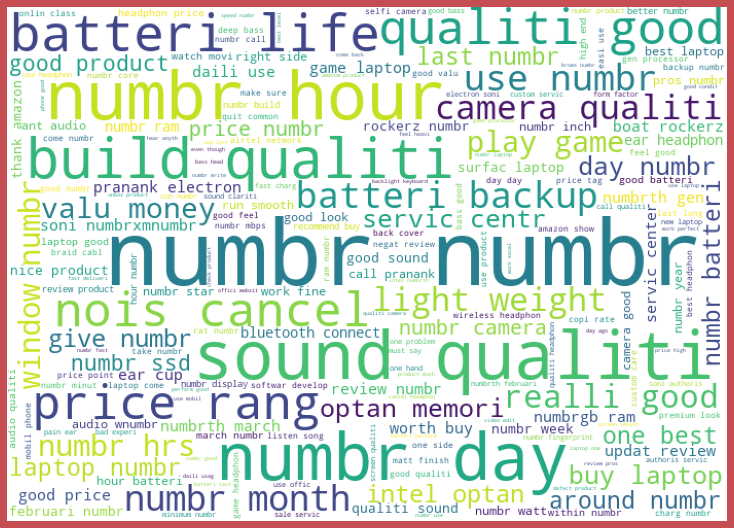

In [31]:
#Getting sense of words in Rating 5
one = df['Product_Review'][df['Ratings']==5.0]

one_cloud = WordCloud(width=700,height=500,background_color='white',max_words=200).generate(' '.join(one))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(one_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

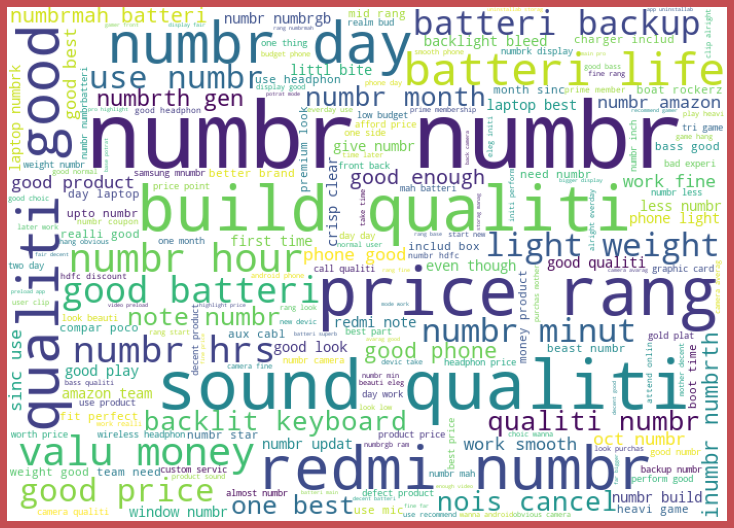

In [32]:
#Getting sense of words in Rating 4
one = df['Product_Review'][df['Ratings']==4.0]

one_cloud = WordCloud(width=700,height=500,background_color='white',max_words=200).generate(' '.join(one))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(one_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

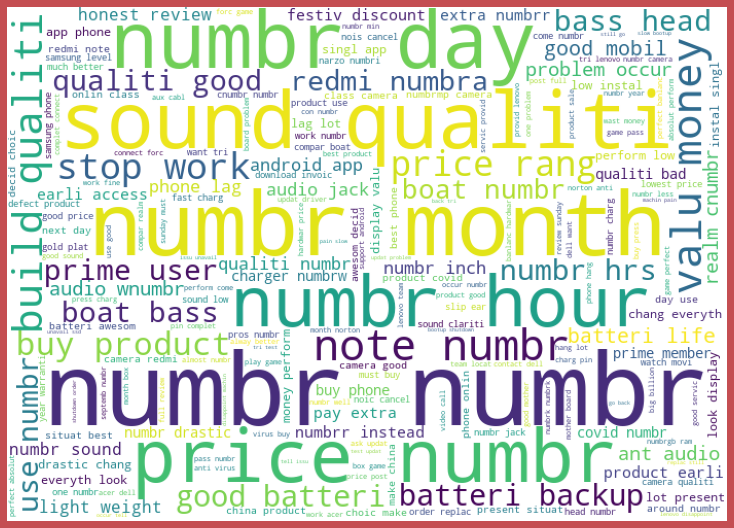

In [33]:
#Getting sense of words in Rating 3
one = df['Product_Review'][df['Ratings']==3.0]

one_cloud = WordCloud(width=700,height=500,background_color='white',max_words=200).generate(' '.join(one))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(one_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

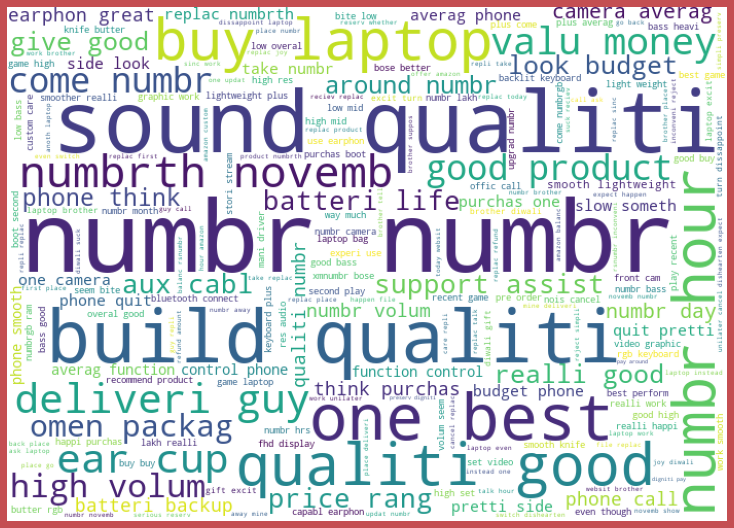

In [34]:
#Getting sense of words in Rating 2
one = df['Product_Review'][df['Ratings']==2.0]

one_cloud = WordCloud(width=700,height=500,background_color='white',max_words=200).generate(' '.join(one))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(one_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

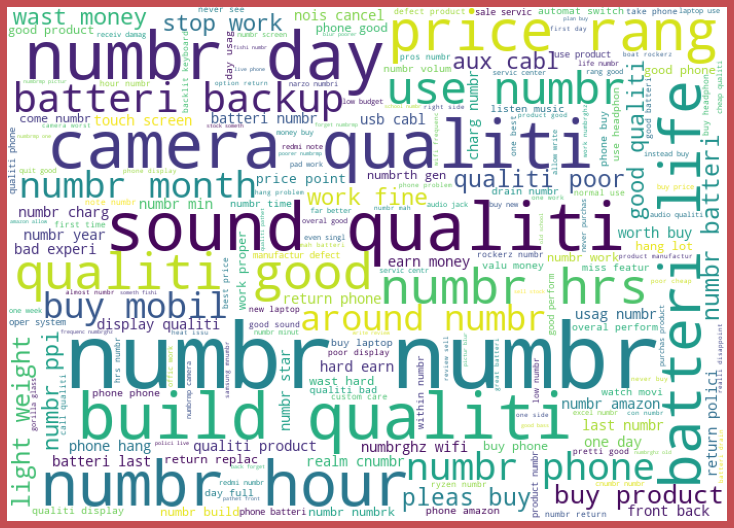

In [35]:
#Getting sense of words in Rating 1
one = df['Product_Review'][df['Ratings']==1.0]

one_cloud = WordCloud(width=700,height=500,background_color='white',max_words=200).generate(' '.join(one))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(one_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

1.The enlarged texts are the most number of words used there and small texts are the less number of words used.

2.It varies according to the ratings.

In [36]:
#Converting text into numeric using TfidfVectorizer
#create object
tf = TfidfVectorizer()

#fitting 
features = tf.fit_transform(df['Product_Review'])
x=features
y=df[['Ratings']]

x.shape

(38000, 3274)

In [37]:
y.shape

(38000, 1)

## Model building

In [38]:
#Importing model building libraries
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

In [39]:
#Initializing the instance of the model
LR=LogisticRegression()
mnb=MultinomialNB()
dtc=DecisionTreeClassifier()
knc=KNeighborsClassifier()
rfc=RandomForestClassifier()
abc=AdaBoostClassifier()
gbc=GradientBoostingClassifier()

models= []
models.append(('Logistic Regression',LR))
models.append(('MultinomialNB',mnb))
models.append(('DecisionTreeClassifier',dtc))
models.append(('KNeighborsClassifier',knc))
models.append(('RandomForestClassifier',rfc))
models.append(('AdaBoostClassifier',abc))
models.append(('GradientBoostingClassifier',gbc))

In [41]:
#Creating train_test_split using best random_state
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=56,test_size=.20)

In [42]:
#Making a for loop and calling the algorithm one by one and save data to respective model using append function
Model=[]
score=[]
cvs=[]
rocscore=[]
for name,model in models:
    print('******************************',name,'***************************')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pre=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test,pre)
    print('accuracy_score: ',AS)
    score.append(AS*100)
    print('\n')
    sc=cross_val_score(model,x,y,cv=5,scoring='accuracy').mean()
    print('cross_val_score: ',sc)
    cvs.append(sc*100)
    print('\n')
    print('Classification report:\n ')
    print(classification_report(y_test,pre))
    print('\n')
    print('Confusion matrix: \n')
    cm=confusion_matrix(y_test,pre)
    print(cm)
    print('\n\n\n')

****************************** Logistic Regression ***************************


LogisticRegression()


accuracy_score:  0.7682894736842105


cross_val_score:  0.3528157894736842


Classification report:
 
              precision    recall  f1-score   support

         1.0       0.73      0.86      0.79      2684
         2.0       0.80      0.65      0.72       378
         3.0       0.79      0.57      0.66       657
         4.0       0.81      0.65      0.72      1213
         5.0       0.79      0.80      0.79      2668

    accuracy                           0.77      7600
   macro avg       0.78      0.71      0.74      7600
weighted avg       0.77      0.77      0.77      7600



Confusion matrix: 

[[2298   14   32   78  262]
 [  61  247    0   16   54]
 [ 179    1  372   23   82]
 [ 237    3   12  794  167]
 [ 376   44   53   67 2128]]




****************************** MultinomialNB ***************************


MultinomialNB()


accuracy_score:  0.7392105263157894


cross_v

In [43]:
#Finalizing the result
result=pd.DataFrame({'Model':Model, 'Accuracy_score': score,'Cross_val_score':cvs})
result

,Model,Accuracy_score,Cross_val_score
0,Logistic Regression,76.828947,35.281579
1,MultinomialNB,73.921053,35.500000
2,DecisionTreeClassifier,76.842105,34.031579
3,KNeighborsClassifier,72.184211,32.665789
4,RandomForestClassifier,76.855263,36.115789
5,AdaBoostClassifier,44.250000,32.865789
6,GradientBoostingClassifier,74.592105,34.718421


We can see that Random Forest algorithms is performing well. Now we will try Hyperparameter Tuning to find out the best parameters and try to increase the scores.

## HyperParameter Tuning

In [44]:
#RandomForestClassifier
parameters={'n_estimators':[1,10,100]}
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
rfc=RandomForestClassifier(random_state=76)   #Using the best random state we obtained
rfc=GridSearchCV(rfc,parameters,cv=3,scoring='accuracy')
rfc.fit(x_train,y_train)
print(rfc.best_params_)     #Printing the best parameters obtained
print(rfc.best_score_)      #Mean cross-validated score of best_estimator

{'n_estimators': 100}
0.7746053470683214


In [45]:
#Using the best parameters obtained
rfc=RandomForestClassifier(random_state=56,n_estimators=100)
rfc.fit(x_train,y_train)
pred=rfc.predict(x_test)
print("Accuracy score: ",accuracy_score(y_test,pred)*100)
print('Cross validation score: ',cross_val_score(rfc,x,y,cv=3,scoring='accuracy').mean()*100)
print('Classification report: \n')
print(classification_report(y_test,pred))
print('Confusion matrix: \n')
print(confusion_matrix(y_test,pred))

Accuracy score:  76.84210526315789
Cross validation score:  40.23429361746957
Classification report: 

              precision    recall  f1-score   support

         1.0       0.73      0.85      0.79      2684
         2.0       0.80      0.68      0.73       378
         3.0       0.77      0.58      0.66       657
         4.0       0.79      0.66      0.72      1213
         5.0       0.80      0.79      0.79      2668

    accuracy                           0.77      7600
   macro avg       0.78      0.71      0.74      7600
weighted avg       0.77      0.77      0.77      7600

Confusion matrix: 

[[2286   18   34   86  260]
 [  52  256    0   21   49]
 [ 174    1  380   28   74]
 [ 232    3   16  806  156]
 [ 376   44   61   75 2112]]


## Finalizing the Model

In [46]:
rfc_prediction=rfc.predict(x)

#Making a dataframe of predictions
rating_prediction=pd.DataFrame({'Predictions':rfc_prediction})
rating_prediction

,Predictions
0,5.0
1,5.0
2,5.0
3,2.0
4,4.0
...,...
37995,1.0
37996,5.0
37997,5.0
37998,5.0


## Saving the Model

In [50]:
#saving our model

import joblib
joblib.dump(rfc,'Rating&Reviews_prediction.csv')

['Rating&Reviews_prediction.csv']

In [51]:
#Saving predicted values
rating_prediction.to_csv('Rating&Reviews_Prediction_Results.csv')